6.0
4.0


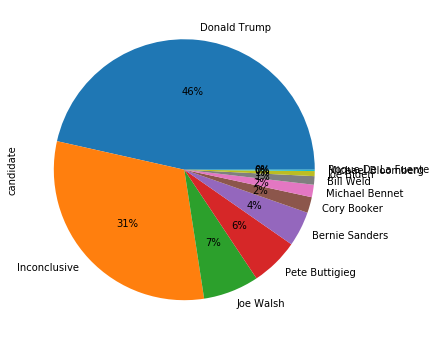

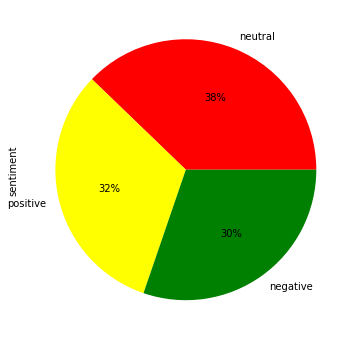

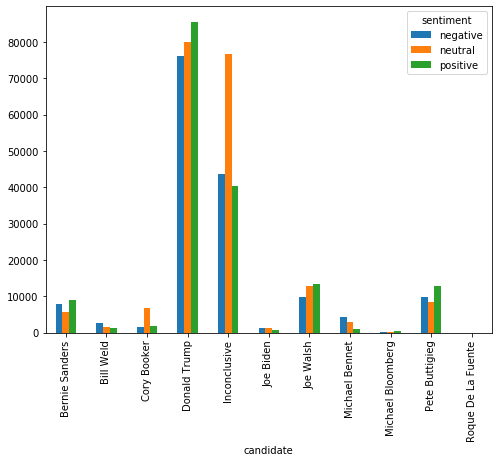

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns


# data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
data_source_url = "../presidential_candidates_2020.csv"
candidate_tweets = pd.read_csv(data_source_url)
candidate_tweets.head()

plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

candidate_tweets.candidate.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

candidate_tweets.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])
plt.show()
candidate_sentiment = candidate_tweets.groupby(['candidate', 'sentiment']).sentiment.count().unstack()
candidate_sentiment.plot(kind='bar')

# sns.barplot(x='sentiment', y='subjectivity' , data=candidate_tweets)


In [3]:
features = candidate_tweets.iloc[:, 3].values
labels = candidate_tweets.iloc[:, 10].values

In [5]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /Users/lehi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [8]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [9]:
predictions = text_classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[28472  1915   996]
 [  567 38288   421]
 [  590  1435 31209]]
              precision    recall  f1-score   support

    negative       0.96      0.91      0.93     31383
     neutral       0.92      0.97      0.95     39276
    positive       0.96      0.94      0.95     33234

    accuracy                           0.94    103893
   macro avg       0.95      0.94      0.94    103893
weighted avg       0.94      0.94      0.94    103893

0.942979796521421
